# Project 3
## B-IT Pattern Recognition



Presented on 4-Jan-2016 by:

- Abdullah Abdullah

- Can Güney Aksakallı

- Kang Cifong

- Umut Hatipoğlu

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import pattrex.plotting_mpl as plt_rex
import pattrex.dimred as dim_rex

## Task 3.1
### Fun with k-means clustering
***

## Task 3.2
### Spectral Clustering
***

## Task 3.3
### Dimensionality Reduction
***

In [5]:
data_X = np.genfromtxt("./data/data-dimred-X.csv", delimiter=',')
data_y = np.genfromtxt("./data/data-dimred-y.csv", delimiter=',')

In [8]:
def demo_3(X, y, k, err=0.0, ddof=0, use_eigh=True):
    print("\n# PCA ######################################")
    res_pca = dim_rex.pca(X, k=k, err=err, use_eigh=use_eigh)
    
    print("\n# LDA ######################################")
    res_lda = lda(X, y, k=k, err=err, use_eigh=use_eigh, ddof=ddof)
        
    projections = [res_pca[0], res_lda[0]]
    classes = np.unique(y)

    # Plotting
    fig = plt.figure(figsize=(12, 8))
    sbp = [1, 2, 0]
    
    for p, t in zip(projections, ["{}D PCA".format(k), "{}D LDA".format(k)]):
        sbp[-1] += 1
        ax = fig.add_subplot(*sbp)
        for c, h in zip(classes, ['r.', 'g.', 'b.']):
            plt_rex.plot2d(p[y == c], False, 
                           axs=ax, hatch=h, show=False, 
                           plotlabel="class {}".format(c), title=t)
        
    return res_pca, res_lda


# PCA ######################################
Found that choosing k as 2 will lead to at most error 59.310584579881876%

# LDA ######################################
Found 3 classes of 500 dimensional data
Class 1.0: 50 samples
Class 2.0: 50 samples
Class 3.0: 50 samples
Found that choosing k as 2 will lead to at most error 77.29489861745998%


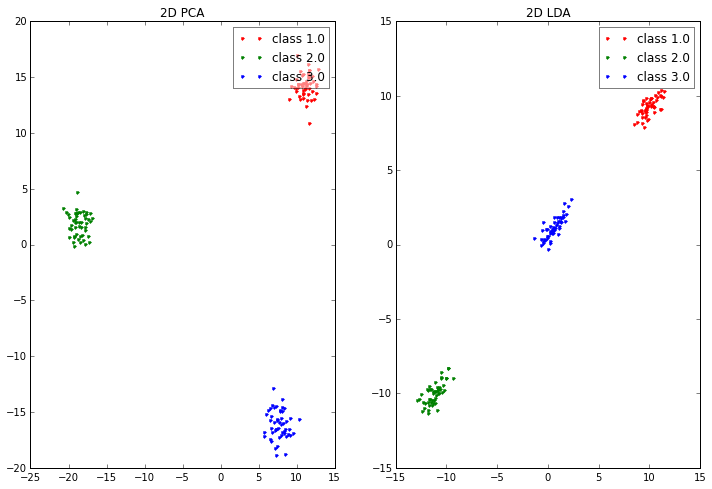

In [9]:
res_pca, res_lda = demo_3(data_X, data_y, 2)

In [2]:
import numpy.linalg as la
def lda(X, y, k=None, err=0.0, use_eigh=True, ddof=0):
    # find the number of classes and corresponding datas and their mean and cov
    classes = np.unique(y)
    dim = X.shape[0]
    X_mean = np.mean(X, axis=1).reshape(dim, 1)

    S_w = np.zeros((dim, dim))
    S_b = np.zeros((dim, dim))

    datas = dict()
    for c in classes:
        datas[c] = dict()
        X_c = X[:, y == c]
        n = X_c.shape[1]

        m = np.mean(X_c, axis=1)
        m = m.reshape(m.shape[0], 1)

        c_ = np.cov(X_c - np.tile(m, (1, n)), ddof=ddof)
        
        m_diff = (m - X_mean).reshape(dim, 1)

        datas[c]["X"] = X_c
        datas[c]["mean"] = m
        datas[c]["n"] = n
        datas[c]["cov"] = c_

        S_w += c_
        S_b += m_diff.dot(m_diff.T)

    print("Found {} classes of {} dimensional data".format(
        len(classes), dim))
    print("\n".join("Class {}: {} samples".format(k, v["n"])
                    for k, v in datas.items()))

    W = la.inv(S_w).dot(S_b)

    # do eigen analysis
    if use_eigh:
        evals, evects = la.eigh(W)

        # The evals are sorted ascending
        idx = np.argsort(np.abs(evals))[::-1]
        evals = np.abs(evals[idx])
        evects = evects[:, idx]
    else:
        evals, evects = la.eig(W)

    sum_evals = np.cumsum(evals)

    if k is None:
        err_ = 1 - err

        k = np.searchsorted(sum_evals, sum_evals[-1] * err_, side='left') + 1

        print("Found for error {}%,"
              "k can be at least {}".format(err * 100, k))

    else:
        err_ = sum_evals[k - 1] / sum_evals[-1]

        print("Found that choosing k as {}"
              " will lead to at most error {}%".format(k, (1 - err_) * 100))

    # Choose the evects for the k
    evects_k = evects[:, :k]

    # project the normalized data in k dim
    projection = (X.T).dot(evects_k)

    return projection, (S_w, S_b, W), (evals, evects)


In [15]:
res = lda(data_X, data_y, k=3)

Found 3 classes of 500 dimensional data
Class 1.0: 50 samples
Class 2.0: 50 samples
Class 3.0: 50 samples
Found that choosing k as 3 will lead to at most error 72.36080941543305%


In [19]:
res[0].shape

(150, 3)

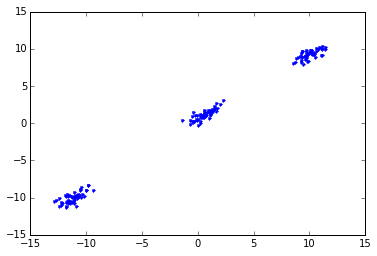

In [16]:
plt.plot(res[0][:, 0], res[0][:, 1], '.')

In [20]:
import sklearn
sklearn.__version__

'0.16.1'

(150, 2)


/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/sklearn/lda.py:371: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<IPython.core.display.Javascript object>


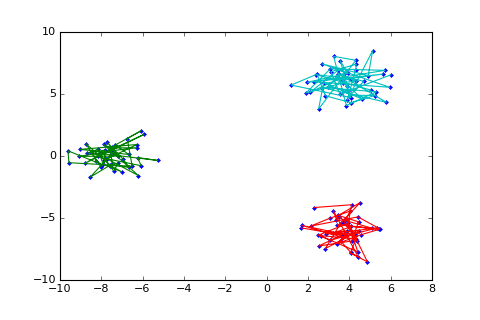

In [29]:
from sklearn.lda import LDA

clf = LDA(n_components=2)
xx = clf.fit_transform(data_X.T, data_y)

print(xx.shape)
%matplotlib notebook
# ax.scatter3D(xx[:, 0], xx[:, 1], xx[:, 2])
plt.plot(xx[:, 0], xx[:, 1], '.')

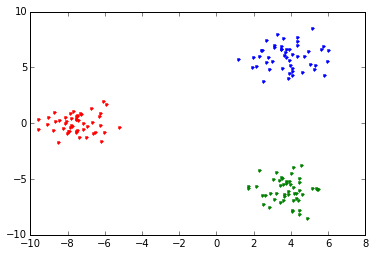

In [34]:
%matplotlib inline
for c, r in zip(np.unique(data_y), ['r.', 'g.', 'b.']):
    plt.plot(xx[data_y == c][:, 0], xx[data_y == c][:, 1], r)

/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


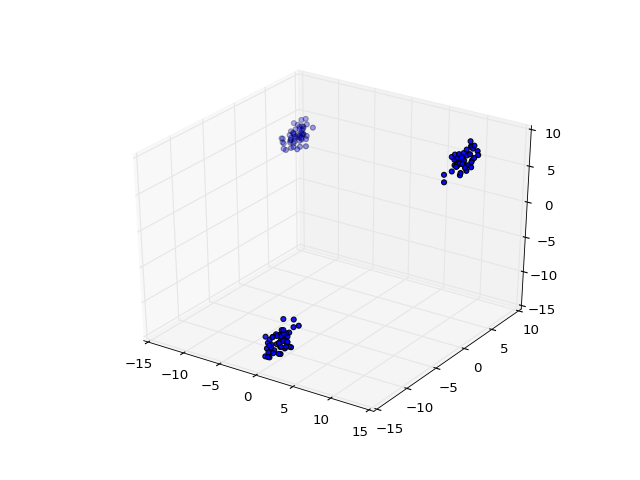

In [18]:
%matplotlib notebook
ax = plt.axes(projection='3d')

ax.scatter3D(res[0][:, 0], res[0][:, 2], res[0][:, 2])

In [ ]:
plt.imshow(res[1][-1])
plt.colorbar()

In [ ]:
plt.plot(res[-1][0])

In [ ]:
plt_rex.plot2d(res[0][data_y == 1.0])

## Task 3.4
### Exploring Numerical Instabilities
***

## References

- 

***
## Questions?